<font font color='red' size="8"> **Facial Expression Recognition** </font>

# Abstract

After we finished Andrew Ng's Deep Learning course, We decided to work on a project in order to pratice what we have learn. We selected the Facial Expression Recognition dataset from [Kaggle](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) to see how good our model predict the expressons on human faces and categorize them in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral) and apply the results into solving business questions. We split the project into three phases: 
1. Replicating the [work](https://github.com/acharyarupesh/Facial-Emotion-Recognition-in-Live-Camera) from previous students to use CNN Sequencial model, VGG19 ConColutional Neural Network and Residual Networks 
2. Expanding the results to answer different business questions 
3. Representing our results to the public

# The Dataset

The dataset, named fer2013, consists of 48 * 48 pixel grayscale images of faces. The faces are more or less centered so that it occupises about the same amount of space in each image. We will categorize the facial expression in to one of the seven categories. The "emotion" column contains numeric code from 0-6, inclusive, for the emoton that is present in the images. The "pixels" column has a string, which is space_related pixel values in row major order, surrounded in quotes for each images. From a respective point of view, we will be predicting the "emotion" column .

The training set has 28,709 inputs while the pulic test set has 3,589. The final test set also consists of 3,859 exmaples

Pierre-Luc Carrier and Aaron Courville prepared this dataset as a part of the ongoing project and they allowed access to the Kaggle competition

### VGG19

VGG-19 is a CNN that is 19 layers deep. The pretrained version is accessible online and it is very effective in classifying images into 1000 object categories like keyboard, mouse, pencil and many animals all thanks to the fact that it was trained on more than a million images from the ImageNet Database.

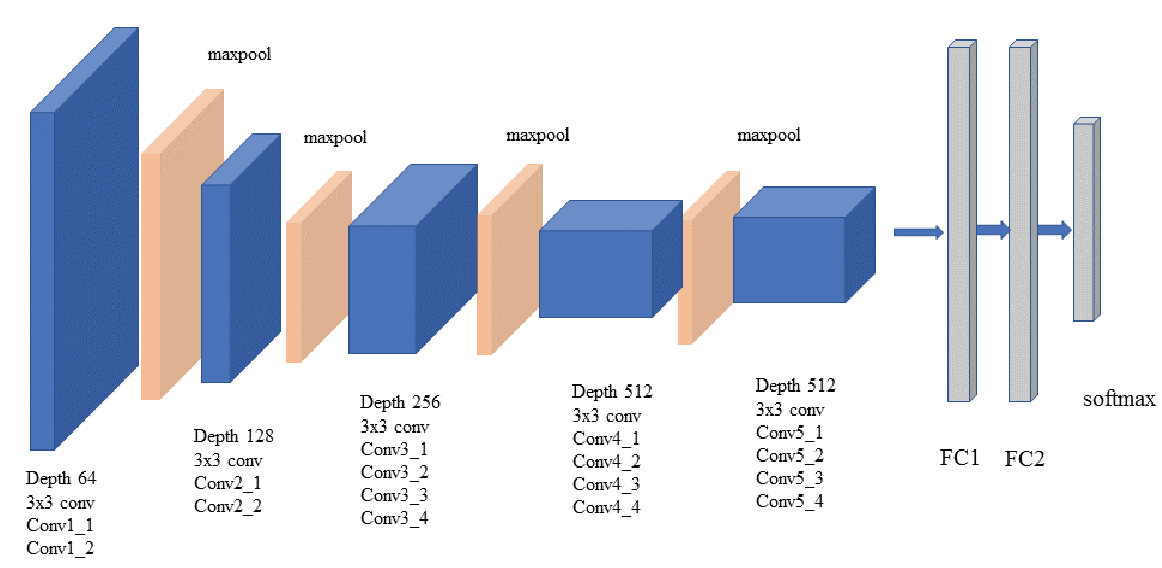

VGG-19 is a big improvement from the VGG-16 model that was develiped by K. Simonyan and A. Zisserman from the University of Oxford. The big difference between VVG-16 and VVG-19 is the fact that the former has 3 additional layers


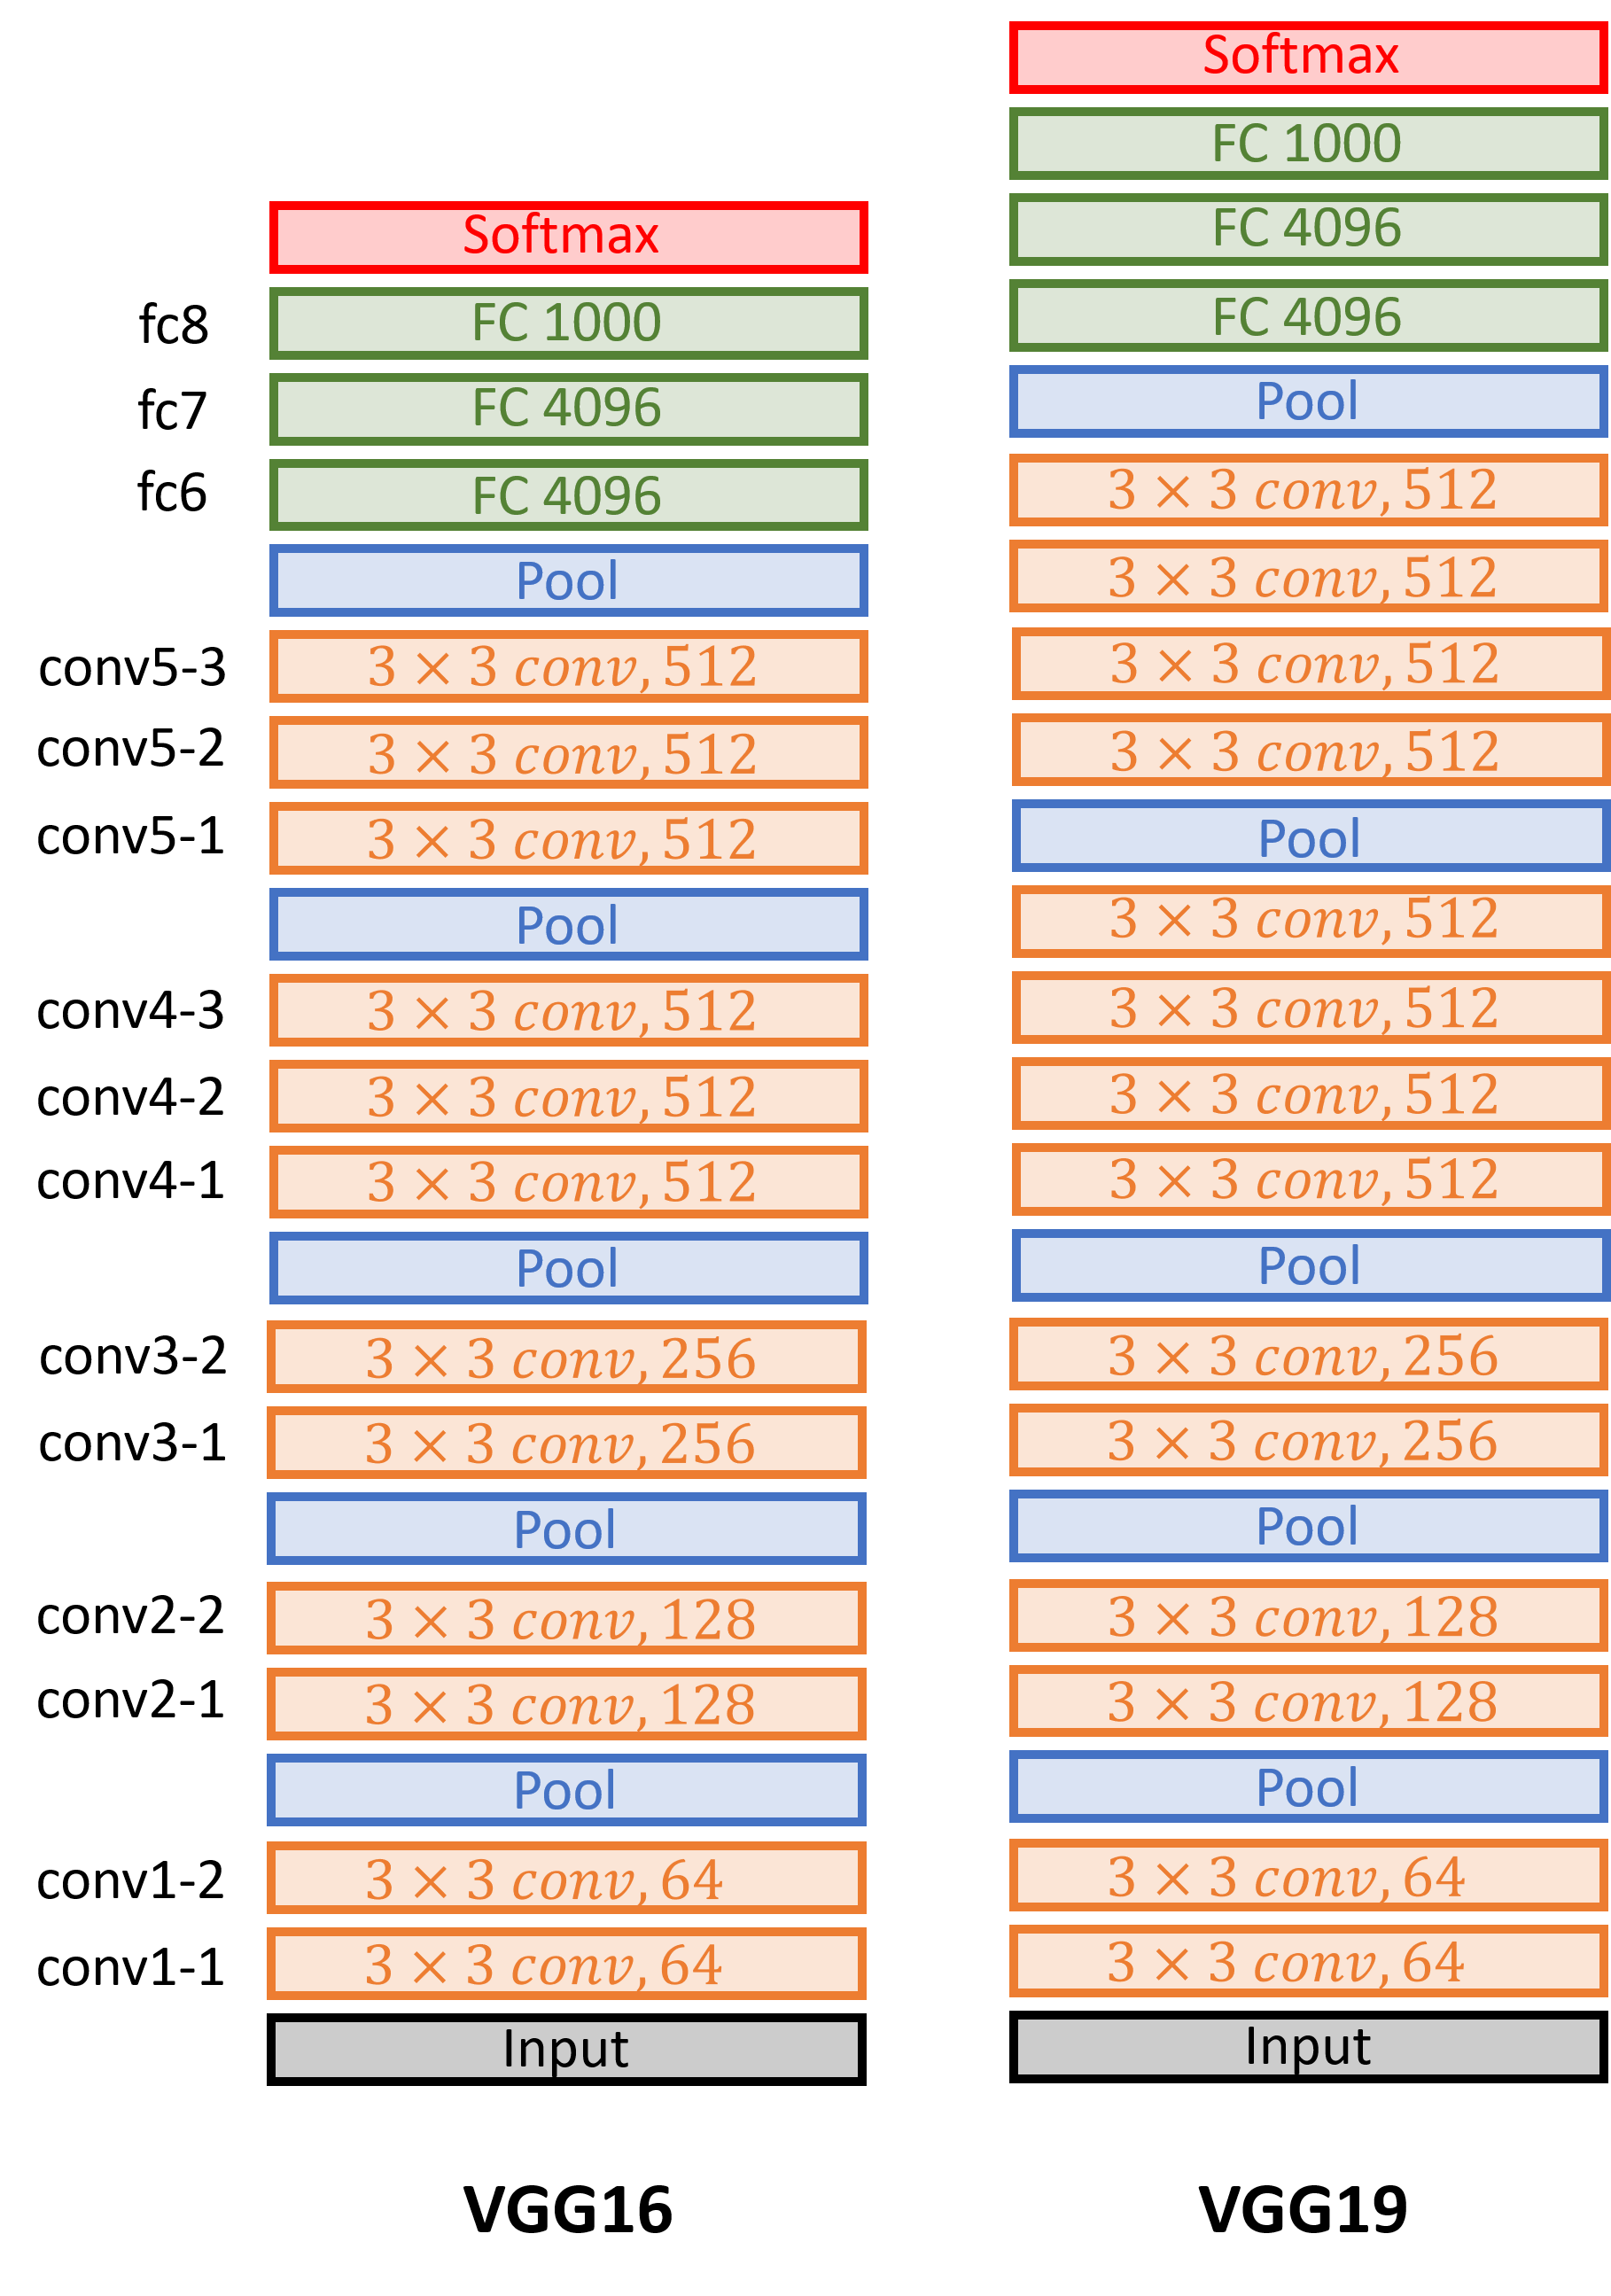

In [ ]:
#Grant access to your Google file first 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tflearn
import numpy as np
from numpy import genfromtxt
from tflearn.data_preprocessing import ImagePreprocessing
import keras

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#read the dataset
with open("fer2013.csv") as f:
    content = f.readlines()
#Converting lines to array as the lines represent the pixels
lines = np.array(content)

num_of_instances = lines.size

In [ ]:
x_train, y_train, x_test, y_test = [], [], [], []

#creating training and testing data [4]
for i in range(1,num_of_instances):
    emotion, img, usage = lines[i].split(",")
    val = img.split(" ")
            
    pixels = np.array(val, 'float32')
        
    emotion = keras.utils.to_categorical(emotion, 7)
    #Creating training and testing set
    if 'Training' in usage:
        y_train.append(emotion)
        x_train.append(pixels)
    elif 'PublicTest' in usage:
        y_test.append(emotion)
        x_test.append(pixels)

In [ ]:
#Converting our training variables to NP array
x_train = np.asarray(x_train, 'float32')
y_train = np.asarray(y_train, 'float32')
x_test = np.asarray(x_test, 'float32')
y_test = np.asarray(y_test, 'float32')

#Since the images are 48x48, reshaping the array to 48x48. And 1 is for grayscale and -1 will automatically detect the number of images.
x_train = x_train.reshape([-1, 48, 48, 1])
x_test = x_test.reshape([-1, 48, 48, 1])

In [ ]:
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression


# Building 'VGG Network'
network = input_data(shape=[None, 48, 48, 1])

network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 128, 3, activation='relu')
network = conv_2d(network, 128, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 256, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = fully_connected(network, 1024, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 1024, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 7, activation='softmax')

network = regression(network, optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     learning_rate=0.0001)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model = tflearn.DNN(network, checkpoint_path='model_vgg',
                    max_checkpoints=1, tensorboard_verbose=0)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
#training the model
model.fit(x_train, y_train, n_epoch=200, shuffle=True,
          show_metric=True, batch_size=128, snapshot_step=20,
          snapshot_epoch=False, run_id='vgg_emotion')

Training Step: 44999  | total loss: 0.06588 | time: 12.301s
| RMSProp | epoch: 200 | loss: 0.06588 - acc: 0.9909 -- iter: 28672/28709
Training Step: 45000  | total loss: 0.06619 | time: 12.361s
| RMSProp | epoch: 200 | loss: 0.06619 - acc: 0.9887 -- iter: 28709/28709
--


In [ ]:
#evaluating the testing score
score = model.evaluate(x_test, y_test)
print('Test accuracy: ', score)

Test accuracy:  [0.5926441906155501]


In [ ]:
#save the trained model
model.save('vgg19_emotion.tfl')

In case you cant train train the model above due to unavailable GPU, we can always use this the already trained one that I created right here 

In [ ]:
#loading the previously trained model to retrain it
#model.load('vgg19_emotion.tfl')

In [ ]:
def detect_emotion(emotions):
    """
    This function classifies the image by converting it NP into array and then predicting the results
    """
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

/home/dong.qu/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


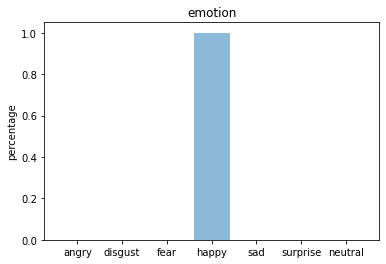

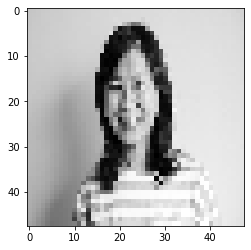

In [ ]:
img = image.load_img("happy face.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)

x = x.flatten()
x = x.reshape([-1, 48, 48, 1])

emotion_prediction = model.predict(x)
detect_emotion(emotion_prediction[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

### Camera Capture
Using a webcam to capture images for processing on the runtime.

In [ ]:
# I have no idea who is the author of the code in this cell that saves an image from a webcam  inside google colab.
# It comes from a notebook called "📸 Take a photo with your webcam"

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)

In [ ]:
Real_pic = take_photo() # click

**Citations**

For Camera capture- https://gist.github.com/ricardodeazambuja/b79724bd0d091fed4c0d44143e9c3127

For VGG19 and ResNet - https://github.com/tflearn/tflearn/tree/master/examples/images

For tflearn - http://tflearn.org/tutorials/

Article on Facial Emotion Recognition using CNN - http://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/

VGG19 CNN - https://www.mathworks.com/help/deeplearning/ref/vgg19.html;jsessionid=ccf9599bd865b423281a56299a68
